In [5]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  #Ingenuo bayeciano
from sklearn.svm import LinearSVC  #Maquina vecto de soporte

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

ModuleNotFoundError: No module named 'plotly'

In [6]:
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba
train, test = train_test_split(data, test_size=0.2, random_state=28)
print(f"El conjunto de datos de entrenamiento {train.shape[0]} registros")
print(f"El conjunto de datos de prueba{test.shape[0]} registros")

El conjunto de datos de entrenamiento 800 registros
El conjunto de datos de prueba200 registros


In [9]:
# Hacer pre-procesamiento del texto
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [10]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values
X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

In [13]:
# Entrenar el modelo
#Modelo de clasificacion Regresion Logistica
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train, y_train)

nb = MultinomialNB()
svm = LinearSVC(class_weight='balanced')

nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train);

In [14]:
# Métricas de evaluación
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

#Exactitud:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.84
Regresión Logística:    0.86
SVM:                    0.84


In [15]:
metricas = [precision_score, recall_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='video_games'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='video_games'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='video_games'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.88
Regresión Logística:    0.86
SVM:                    0.86

recall_score
Naive Bayes:            0.78
Regresión Logística:    0.84
SVM:                    0.79



Text(0.5, 1.0, 'Regresión Logística')

<Figure size 1080x1080 with 0 Axes>

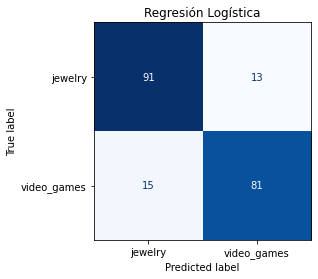

In [16]:
fig = plt.figure(figsize=(15,15))
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues').im_.colorbar.remove()
plt.title("Regresión Logística")

In [17]:
# Términos más importantes de cada categoría
vocab = {value:key for key, value in tfidf_vect.vocabulary_.items()}
[(vocab[e[0]],round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))][:10]

[('calidad', -1.96),
 ('bonitos', -1.91),
 ('pulsera', -1.88),
 ('bonito', -1.83),
 ('foto', -1.83),
 ('cadena', -1.58),
 ('bonita', -1.45),
 ('plata', -1.42),
 ('pendientes', -1.39),
 ('pequeño', -1.29)]

In [18]:
[(vocab[e[0]],round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))][-10:]

[('juegos', 1.04),
 ('hijo', 1.08),
 ('solo', 1.08),
 ('perfecto', 1.11),
 ('consola', 1.2),
 ('ps', 1.33),
 ('jugar', 1.34),
 ('funciona', 1.35),
 ('mando', 1.87),
 ('juego', 3.54)]